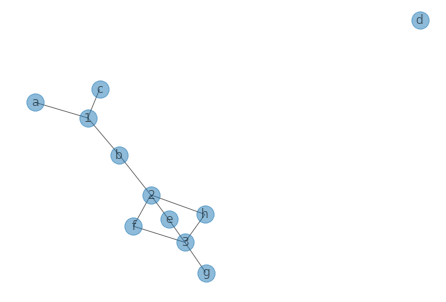

------------------------------------------------------------------------------------


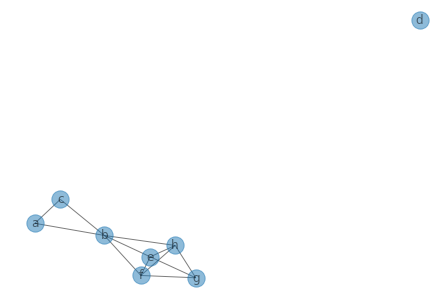

a 2
e 4
d 0
c 2
b 5
f 4
h 4
g 3
------------------------------------------------------------------------------------


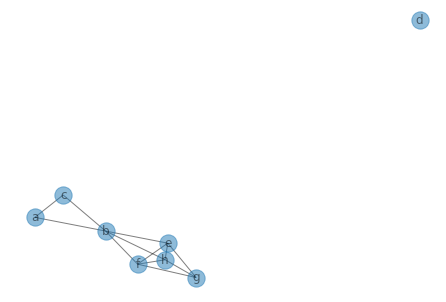

a 2
e 6
d 0
c 2
b 5
f 6
h 6
g 3


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

g = nx.Graph()
g.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], bipartite=0)
g.add_nodes_from(['1', '2', '3'], bipartite=1)
g.add_edges_from([
    ('1', 'a'),
    ('1', 'b'),
    ('1', 'c'),
    ('2', 'b'),
    ('2', 'e'),
    ('2', 'f'),
    ('2', 'h'),
    ('3', 'e'),
    ('3', 'f'),
    ('3', 'g'),
    ('3', 'h')
])

pos = nx.spring_layout(g, seed=777)
nx.draw(g, pos, with_labels=True, alpha=0.5)
plt.show()

top_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 1}

print('------------------------------------------------------------------------------------')
p = bipartite.projected_graph(g, nodes=top_nodes)
pos = nx.spring_layout(p, seed=777)
nx.draw(p, pos, with_labels=True, alpha=0.5)
plt.show()
for e in p:
    print(e, p.degree(e))

print('------------------------------------------------------------------------------------')
pw = bipartite.weighted_projected_graph(g, nodes=top_nodes, ratio=False)
pos = nx.spring_layout(pw, seed=777)
nx.draw(pw, pos, with_labels=True, alpha=0.5)
plt.show()
for e in pw:
    print(e, pw.degree(e, weight='weight'))
